# Student Performance Indicator

### Lifecycle of Machine Learning project


* Understanding the Problem Statement
* Data Collection 
* Data Checks to perform
* Exploratory Data analysis
* Data Pre-processing
* Model Training
* Choose best model

#### 1. Problem Statement

* This projet understands how the student's performance (test score) is affected by other variables such as Gender, Race/Ethnicity, Parental level of education, Lunch and Test Preparation Course.

#### 2. Data Collection

* Dataset Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetid=74977
* The data consists of 8 features and 1000 samples.

##### 2.1 Import Data and Required Packages

Importing pandas, numpy, matplotlib, seaborn and warnings library

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as pandas DataFrame

In [7]:
df = pd.read_csv('data/student_performance.csv')

Show top 5 records

In [8]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

Shape of the dataset

In [9]:
df.shape

(1000, 8)

##### 2.2 Dataset Infomation

* gender : sex of students -> (Male/Female)
* race/ethnicity : ethnicity of students ->(Group A, B, C, D, E)
* parental level of education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score 
* reading score
* writing score

#### 3. Data Checks to perform

* Check missing values
* Check duplicates
* Check data types
* Check check the number of unique values in each column
* Check statistics of the dataset
* Check various categories present in the different categorical column

##### 3.1. Check Missing values

In [11]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

##### 3.2 check Duplicates

In [13]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

##### 3.2. Check data types

In [14]:
# check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Checking the number of unique values of each column

In [16]:
# Nunique()
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.5 Check statistics of dataset

In [18]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Insights

* From the above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are close - between 14.6 to 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

In [ ]:
##### 3.6 Exploring Data

In [21]:
print("Categories in 'gender' variable : ",end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable : ",end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable : ",end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable : ",end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable : ",end="")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable : ['female' 'male']
Categories in 'race/ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable : ['standard' 'free/reduced']
Categories in 'test preparation course' variable : ['none' 'completed']


In [22]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [28]:
# define numerical and categorical columns
# 'O' (caps o) -> object
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

# print columns
print("we have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [30]:
df.head(3)

gender race_ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93

##### 3.8 Adding columns for "Total Score" and "Average"
Feature Engineering kinda

In [31]:
# output features
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

df.head()


gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [32]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full makrs in MAth : {math_full}')
print(f'Number of students with full makrs in Writing : {writing_full}')
print(f'Number of students with full makrs in Reading : {reading_full}')

Number of students with full makrs in MAth : 7
Number of students with full makrs in Writing : 14
Number of students with full makrs in Reading : 17


In [33]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in MAth : {math_less_20}')
print(f'Number of students with less than 20 marks in Writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading : {reading_less_20}')

Number of students with less than 20 marks in MAth : 4
Number of students with less than 20 marks in Writing : 3
Number of students with less than 20 marks in Reading : 1


Insights

* From the above values, we get students have performed the worst in math
* Best performance is in reading section

#### 4. Exploring Data (Visualization)

##### 4.1 Visualize average score Distribution to make some conclusions

* Histogram
* Kernel Distribution Function (KDE)

In [41]:
####### 4.1.1 Histogram and KDE

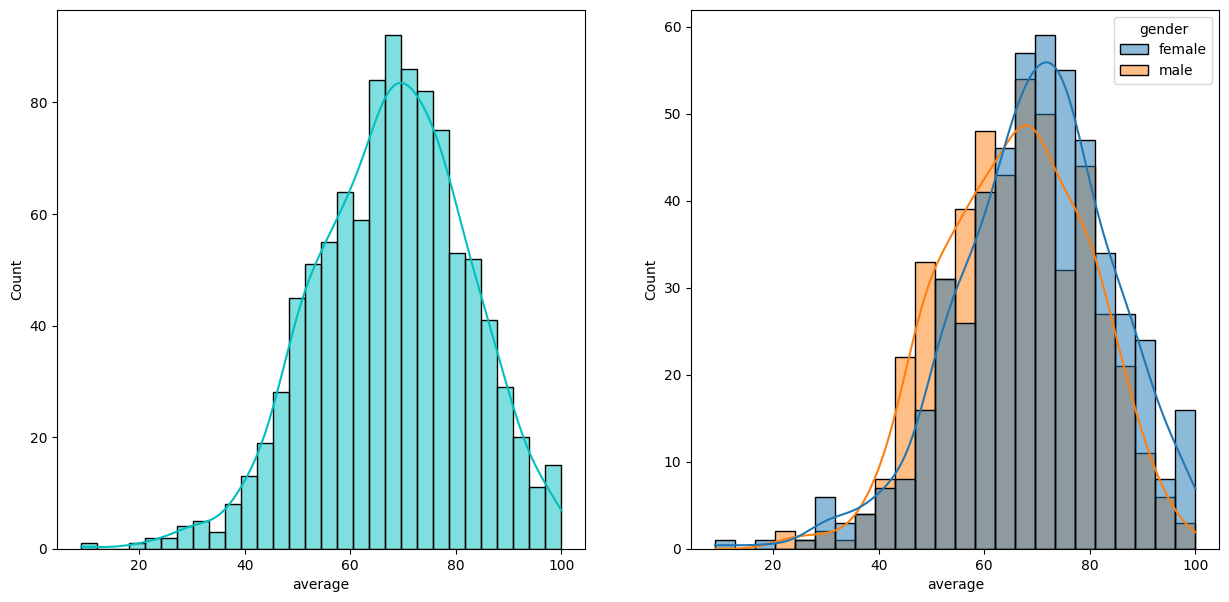

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30,kde=True,color='c') #cyan
plt.subplot(122)

# average based of gender --> increasing in female (lol)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

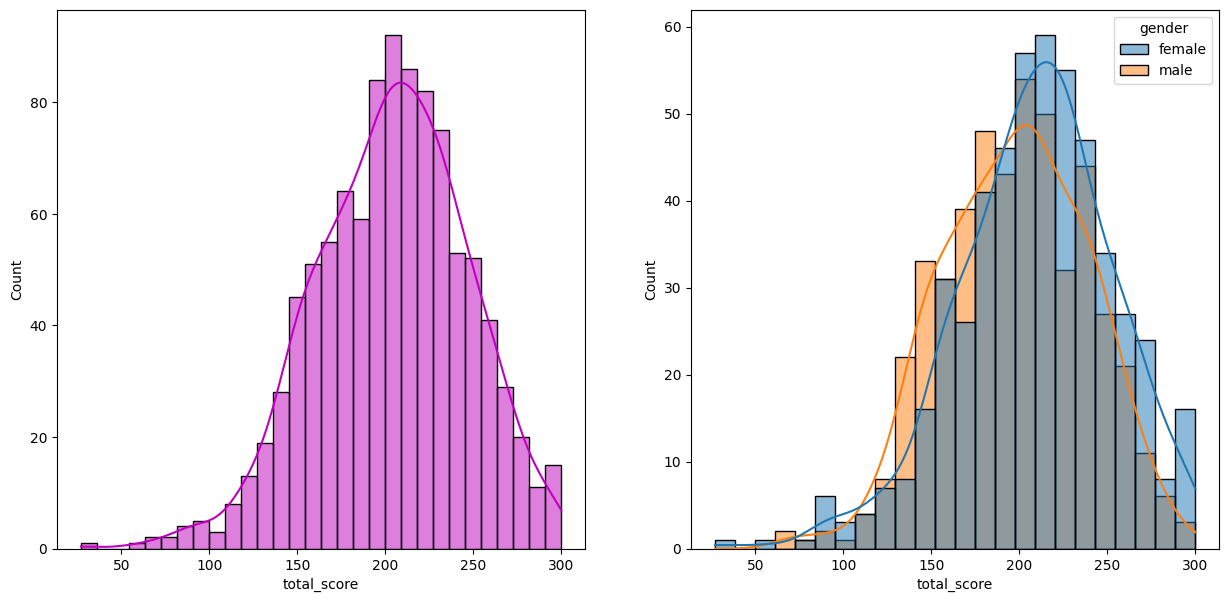

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30,kde=True,color='m') # magenta :)
plt.subplot(122)

# average based of total score
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insights

* Female students tend to perform well than male students

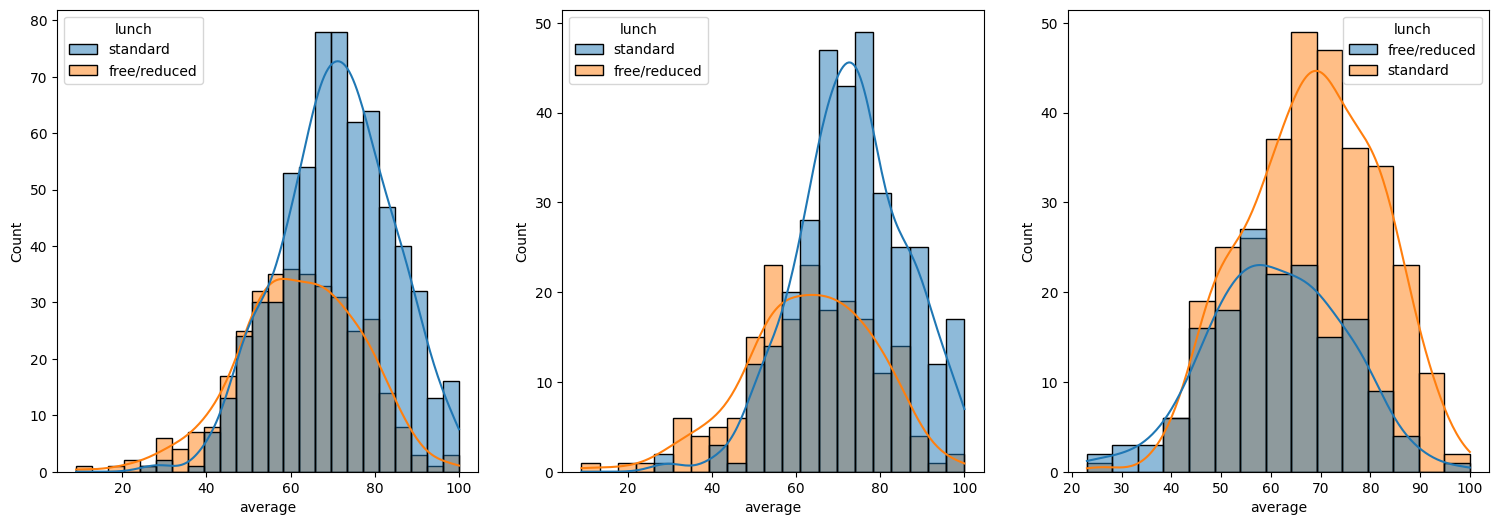

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps to perform well in exams be it a male or female.

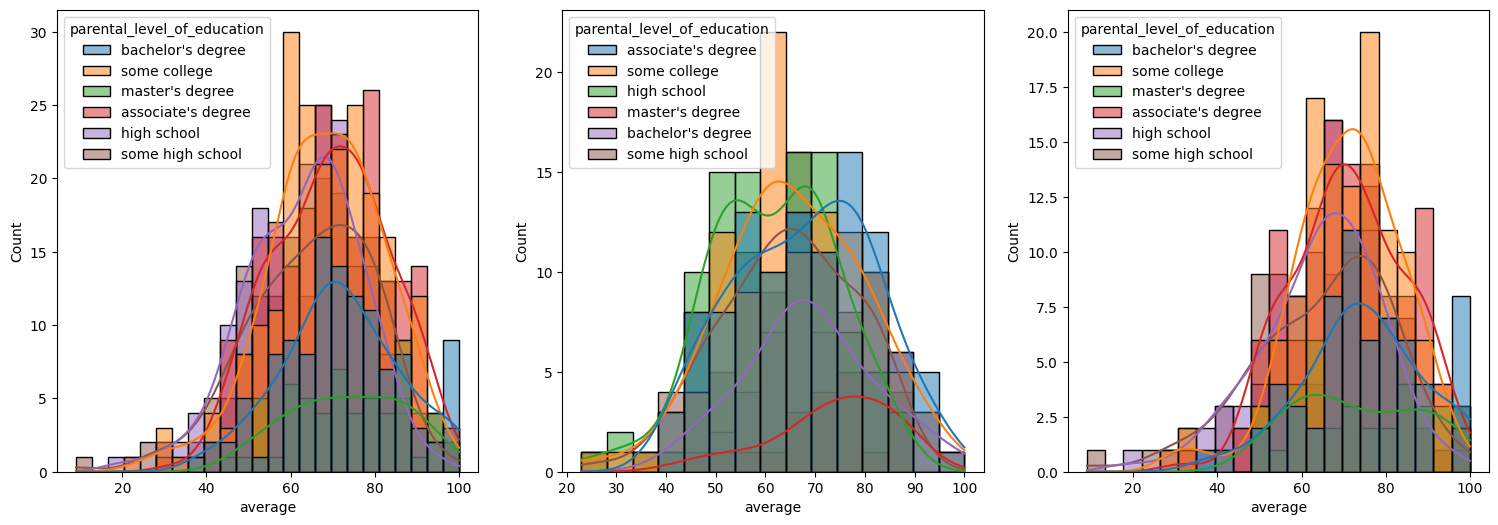

In [55]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
* In general parents' education don't help student perfowm well in exam according to this data.
* Second plot shows that parents' whole education is of associate's degree or master's degree their male child tend to perform well in exam.
* Third plot we can see there is no effect of parents' education on female students.

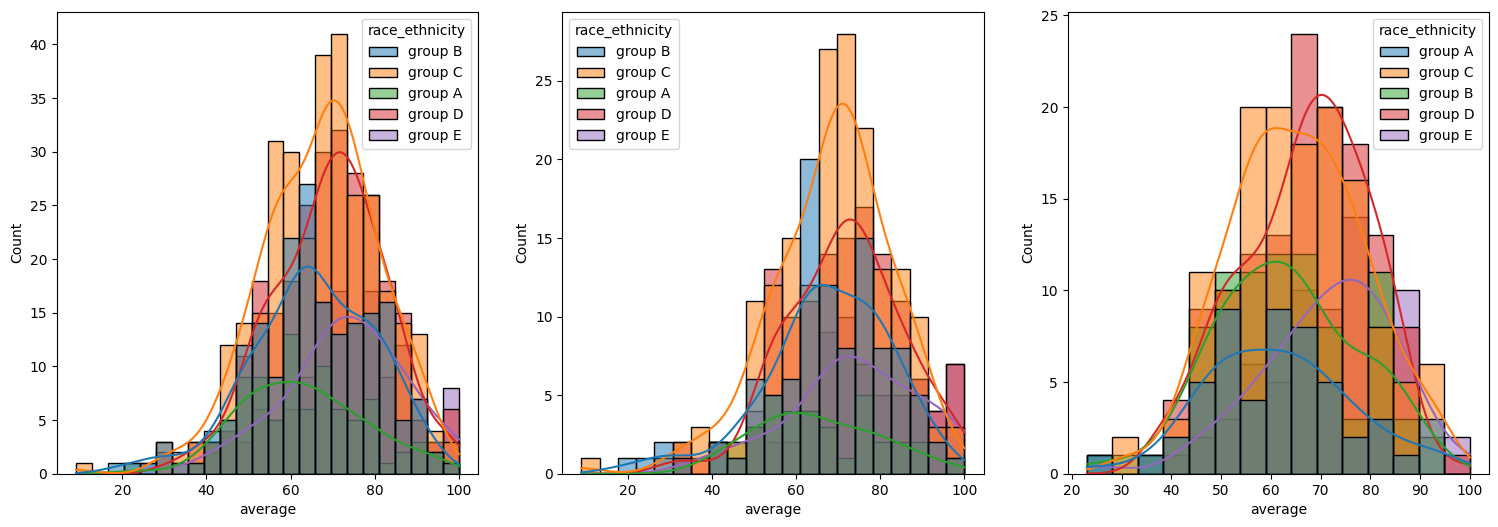

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of Group A and Group B tends to perform poorly in exam irrespective of whether they are male or female.

##### 4.2 Maximum score of students in all three subjects

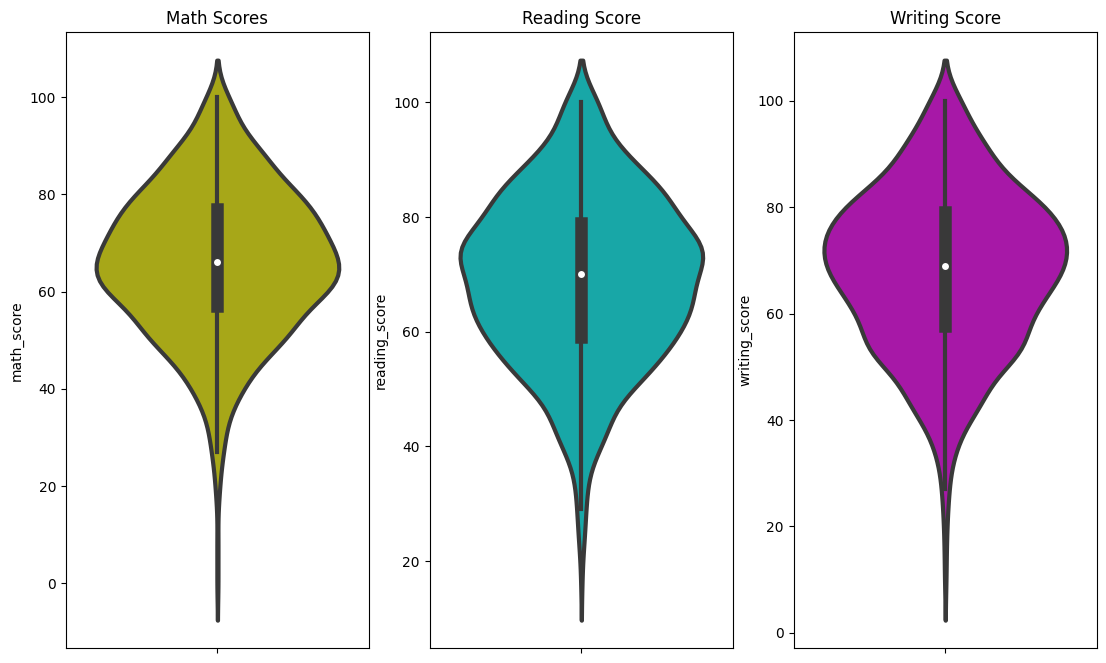

In [59]:
plt.figure(figsize=(18,8))

plt.subplot(1,4,1)
plt.title("Math Scores")
sns.violinplot(y='math_score',data=df, color='y', linewidth=3)

plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(y='reading_score', data=df, color='c', linewidth=3)

plt.subplot(1,4,3)
plt.title("Writing Score")
sns.violinplot(y='writing_score',data=df, color='m',linewidth=3)

plt.show()

Insights
* From the above 3 plots its clearly visible that most of the students score in between 60 to 80 in Math whereas in reading and writing most of them score from 50 to 80


##### 4.3 Multivariate Analysis using PiePlot